In [1]:
# package(s) related to time, space and id
import datetime, time
import platform

# you need these dependencies (you can get these from anaconda)
# package(s) related to the simulation
import simpy
import pandas as pd

# spatial libraries 
import pyproj
import shapely.geometry
from simplekml import Kml, Style

# package(s) for data handling
import numpy as np
import matplotlib.pyplot as plt

# OpenTNSim
import opentnsim

# Used for mathematical functions
import math             

# Used for making the graph to visualize our problem
import networkx as nx   

In [2]:
amount=30000 #ton
d=300 #km distance 
# v=3.5m/s
# h=6,6,6

In [3]:
# make a list of Tuples
fuel_kg_km=[17.34, 9.74,7.44,7.18,7.41,7.92]  #  fuel consumption kg/km of payload=0t,500t,1000t,1500t,2000t,2500t; corresponding T=1.4,1.7,2.1,2.6,3,3.5
fuel_0=0
fuel_500=d*(fuel_kg_km[0]+fuel_kg_km[1])*amount/500/10000 #10ton
fuel_1000=d*(fuel_kg_km[0]+fuel_kg_km[2])*amount/1000/10000 #10ton
fuel_1500=d*(fuel_kg_km[0]+fuel_kg_km[3])*amount/1500/10000 #10ton
fuel_2000=d*(fuel_kg_km[0]+fuel_kg_km[4])*amount/2000/10000 #10ton
fuel_2500=d*(fuel_kg_km[0]+fuel_kg_km[5])*amount/2500/10000 #10ton

fuel_trips=[fuel_0,fuel_500,fuel_1000,fuel_1500,fuel_2000,fuel_2500] # (loaded go+ unloaded return)*trips
index = ['0 ton','500 ton','1000 ton','1500 ton','2000 ton','2500 ton']
dffuel = pd.DataFrame({'fuel consumption (kg/km)': fuel_kg_km,
                   'fuel total trips consumption (10 ton)':fuel_trips}, index=index)
                  
dffuel.head()

,fuel consumption (kg/km),fuel total trips consumption (10 ton)
0 ton,17.34,0.0000
500 ton,9.74,48.7440
1000 ton,7.44,22.3020
1500 ton,7.18,14.7120
2000 ton,7.41,11.1375


<AxesSubplot:>

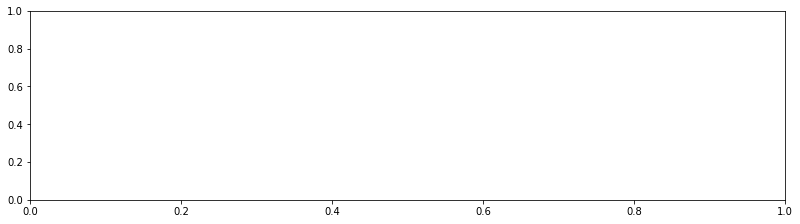

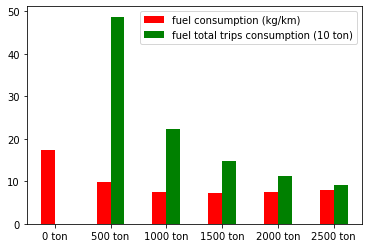

In [4]:
fig, axs = plt.subplots( figsize=(11, 3), constrained_layout=True)
dffuel.plot.bar(color={"fuel consumption (kg/km)": "red", "fuel total trips consumption (10 ton)": "green"},rot=0)

In [5]:
# make a list of Tuples

CO2_kg_km=[55.000,30.903,23.614,22.771,23.503,25.134]  #  emission rate of payload=0t,500t,1000t,1500t,2000t,2500t 
CO2_0=0
CO2_500=d*(CO2_kg_km[0]+CO2_kg_km[1])*amount/500/10000 #10ton
CO2_1000=d*(CO2_kg_km[0]+CO2_kg_km[2])*amount/1000/10000
CO2_1500=d*(CO2_kg_km[0]+CO2_kg_km[3])*amount/1500/10000
CO2_2000=d*(CO2_kg_km[0]+CO2_kg_km[4])*amount/2000/10000
CO2_2500=d*(CO2_kg_km[0]+CO2_kg_km[5])*amount/2500/10000

CO2_trips=[CO2_0,CO2_500,CO2_1000,CO2_1500,CO2_2000,CO2_2500] # (loaded go+ unloaded return)*trips
index = ['0 ton','500 ton','1000 ton','1500 ton','2000 ton','2500 ton']
dfCO2 = pd.DataFrame({'CO2 emission rate (kg/km)': CO2_kg_km,
                   'CO2 total trips emission (10 ton)':CO2_trips}, index=index)
                  
dfCO2.head()

,CO2 emission rate (kg/km),CO2 total trips emission (10 ton)
0 ton,55.000,0.00000
500 ton,30.903,154.62540
1000 ton,23.614,70.75260
1500 ton,22.771,46.66260
2000 ton,23.503,35.32635


<AxesSubplot:>

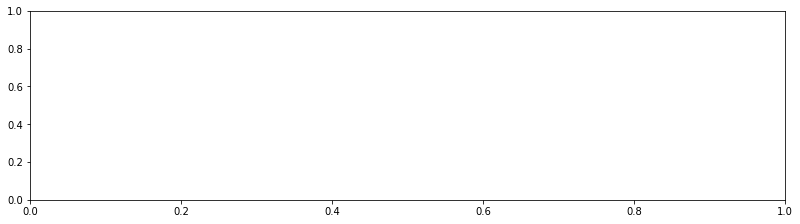

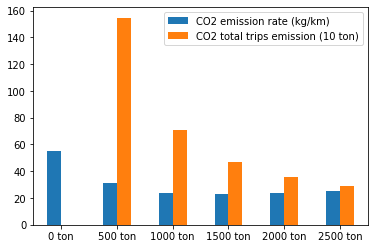

In [6]:
fig, axs = plt.subplots( figsize=(11, 3), constrained_layout=True)
dfCO2.plot.bar(rot=0)

In [7]:
# make a list of Tuples

PM10_g_km=[30.61,17.32,13.85,13.45,13.8,14.56]  #  emission rate of payload=0t,500t,1000t,1500t,2000t,2500t 
PM10_0=0
PM10_500=d*(PM10_g_km[0]+PM10_g_km[1])*amount/500/10000  #10kg
PM10_1000=d*(PM10_g_km[0]+PM10_g_km[2])*amount/1000/10000
PM10_1500=d*(PM10_g_km[0]+PM10_g_km[3])*amount/1500/10000
PM10_2000=d*(PM10_g_km[0]+PM10_g_km[4])*amount/2000/10000
PM10_2500=d*(PM10_g_km[0]+PM10_g_km[5])*amount/2500/10000

PM10_trips=[PM10_0,PM10_500,PM10_1000,PM10_1500,PM10_2000,PM10_2500] # (loaded go+ unloaded return)*trips
index = ['0 ton','500 ton','1000 ton','1500 ton','2000 ton','2500 ton']
dfPM10 = pd.DataFrame({'PM10 emission rate (g/km)': PM10_g_km,
                   'PM10 total trips emission (10kg)':PM10_trips}, index=index)

# PM10=np.array([[30.61,17.32,13.85,13.45,13.8,14.56],[PM10_0,PM10_500,PM10_1000,PM10_1500,PM10_2000,PM10_2500]])
# # Create a DataFrame object
# dfPM10 = pd.DataFrame(PM10,
#                      columns=['0 ton','500 ton','1000 ton','1500 ton','2000 ton','2500 ton'])
                  
dfPM10.head()

,PM10 emission rate (g/km),PM10 total trips emission (10kg)
0 ton,30.61,0.0000
500 ton,17.32,86.2740
1000 ton,13.85,40.0140
1500 ton,13.45,26.4360
2000 ton,13.80,19.9845


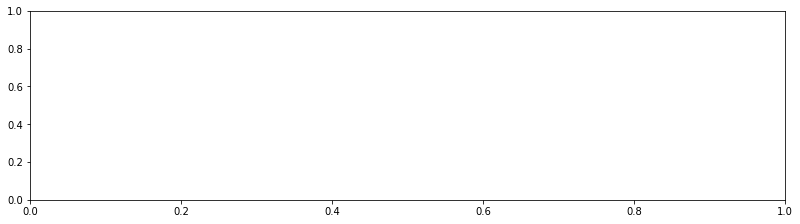

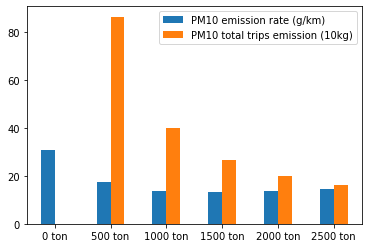

In [8]:
fig, axs = plt.subplots( figsize=(11, 3), constrained_layout=True)
ax = dfPM10.plot.bar(rot=0)

In [9]:
# make a list of Tuples

NOX_g_km=[772.66,419.10,325.25,314.62,323.86,344.19]  #  emission rate of payload=0t,500t,1000t,1500t,2000t,2500t 
NOX_0=0
NOX_500=d*(NOX_g_km[0]+NOX_g_km[1])*amount/500/10000 #10kg
NOX_1000=d*(NOX_g_km[0]+NOX_g_km[2])*amount/1000/10000 
NOX_1500=d*(NOX_g_km[0]+NOX_g_km[3])*amount/1500/10000 
NOX_2000=d*(NOX_g_km[0]+NOX_g_km[4])*amount/2000/10000
NOX_2500=d*(NOX_g_km[0]+NOX_g_km[5])*amount/2500/10000 

NOX_trips=[NOX_0,NOX_500,NOX_1000,NOX_1500,NOX_2000,NOX_2500] # (loaded go+ unloaded return)*trips
index = ['0 ton','500 ton','1000 ton','1500 ton','2000 ton','2500 ton']
dfNOX = pd.DataFrame({'NOX emission rate (g/km)': NOX_g_km,
                   'NOX total trips emission (10kg)':NOX_trips}, index=index)
                  
dfNOX.head()

,NOX emission rate (g/km),NOX total trips emission (10kg)
0 ton,772.66,0.000
500 ton,419.10,2145.168
1000 ton,325.25,988.119
1500 ton,314.62,652.368
2000 ton,323.86,493.434


<AxesSubplot:>

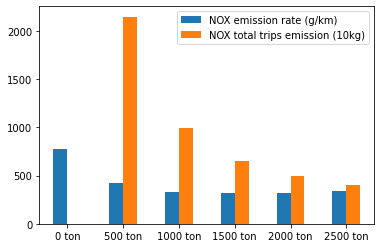

In [10]:
dfNOX.plot.bar(rot=0)

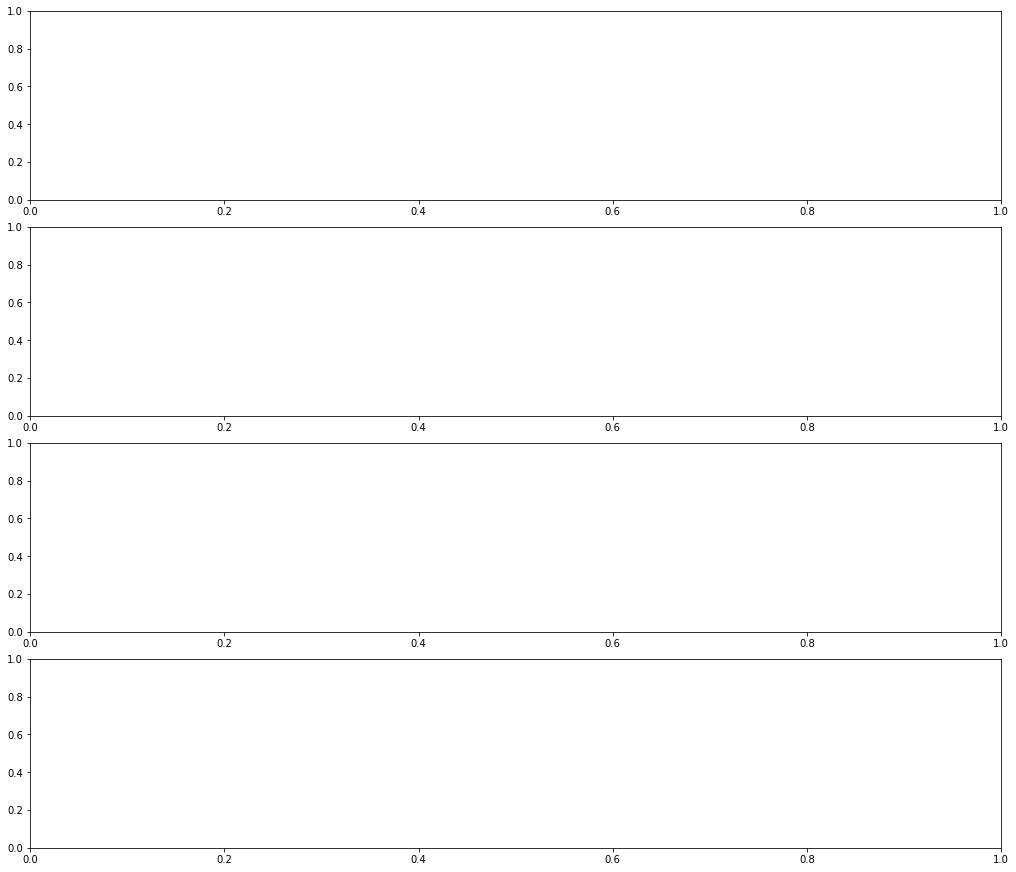

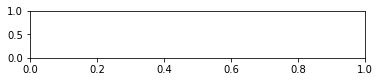

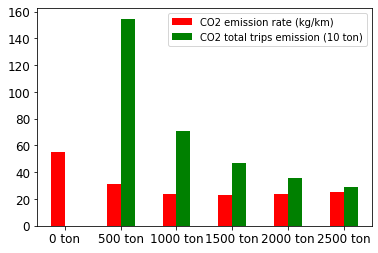

In [11]:
fig, axs = plt.subplots(4, 1, figsize=(14, 12), constrained_layout=True)
fontsize=15

plt.subplot(411)
dffuel.plot.bar(color={"fuel consumption (kg/km)": "red", "fuel total trips consumption (10 ton)": "green"},rot=0)
plt.ylabel('fuel consumption',fontsize=15)

plt.subplot(412)
dfCO2.plot.bar(color={"CO2 emission rate (kg/km)": "red", "CO2 total trips emission (10 ton)": "green"},rot=0,fontsize=12)

# plt.subplot(413)

# plt.subplot(414)
plt.show()

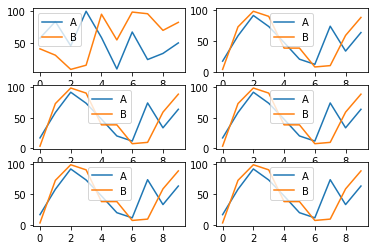

In [13]:

# dataframe sample data
df1 = pd.DataFrame(np.random.rand(10,2)*100, columns=['A', 'B'])
df2 = pd.DataFrame(np.random.rand(10,2)*100, columns=['A', 'B'])
df3 = pd.DataFrame(np.random.rand(10,2)*100, columns=['A', 'B'])
df4 = pd.DataFrame(np.random.rand(10,2)*100, columns=['A', 'B'])
df5 = pd.DataFrame(np.random.rand(10,2)*100, columns=['A', 'B'])
df6 = pd.DataFrame(np.random.rand(10,2)*100, columns=['A', 'B'])
#define number of rows and columns for subplots
nrow=3
ncol=2
# make a list of all dataframes 
df_list = [df1 ,df2, df3, df4, df5, df6]
fig, axes = plt.subplots(nrow, ncol)
# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        df_list[count].plot(ax=axes[r,c])
        count=+1